# Assessment 1

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


##  Question 1


In [6]:
database = 'jupiter.db'
connectable = f'sqlite:///{database}'

jupiter_df = pd.read_sql('SELECT * FROM moons', connectable)

jupiter_df['group'] = jupiter_df['group'].replace('Hamilia', 'Himalia')

jupiter_df.head()


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


In [7]:
jupiter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   moon             56 non-null     object 
 1   period_days      56 non-null     float64
 2   distance_km      56 non-null     float64
 3   radius_km        56 non-null     float64
 4   mag              53 non-null     float64
 5   mass_kg          6 non-null      float64
 6   group            56 non-null     object 
 7   ecc              56 non-null     float64
 8   inclination_deg  56 non-null     float64
dtypes: float64(7), object(2)
memory usage: 4.1+ KB


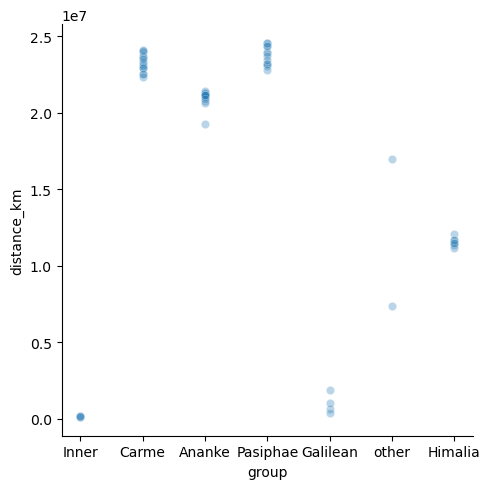

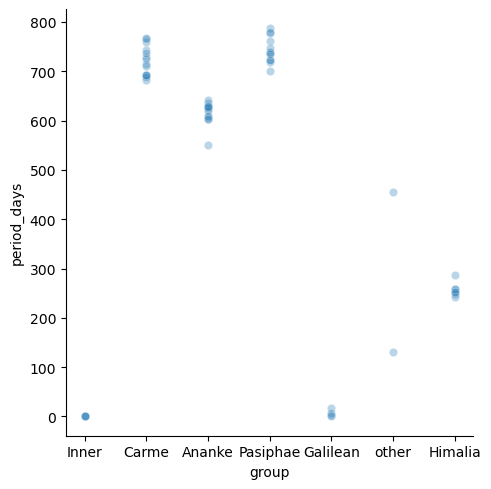

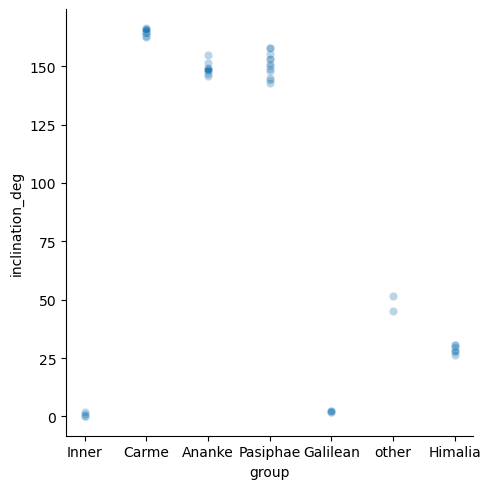

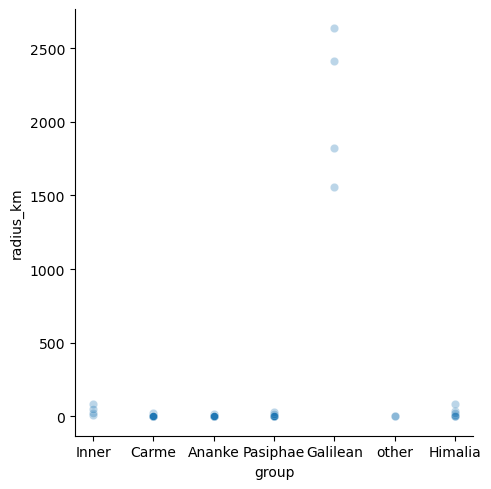

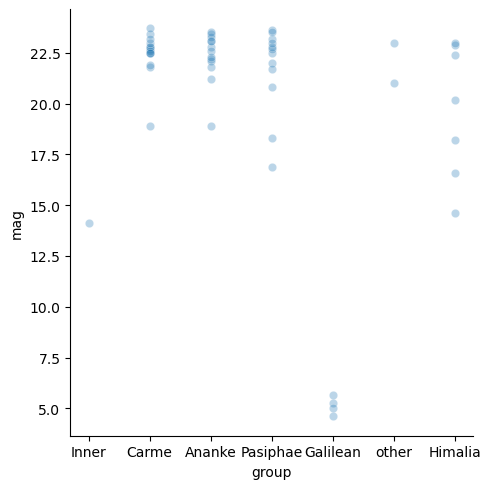

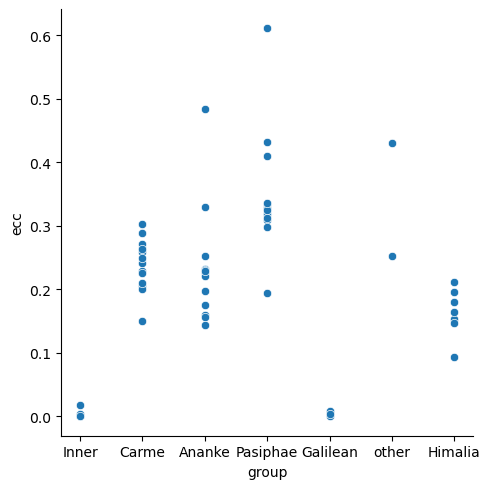

In [8]:
sns.relplot(data=jupiter_df, x='group', y='distance_km', alpha=0.3)
sns.relplot(data=jupiter_df, x='group', y='period_days', alpha=0.3)
sns.relplot(data=jupiter_df, x='group', y='inclination_deg', alpha=0.3)
sns.relplot(data=jupiter_df, x='group', y='radius_km', alpha=0.3)
sns.relplot(data=jupiter_df, x='group', y='mag', alpha=0.3)
sns.relplot(data=jupiter_df, x='group', y='ecc')

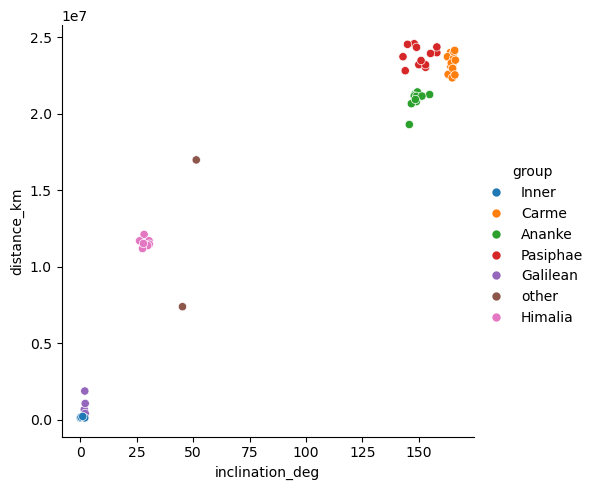

In [9]:
sns.relplot(data=jupiter_df, x='inclination_deg', y='distance_km', hue='group')

<Axes: >

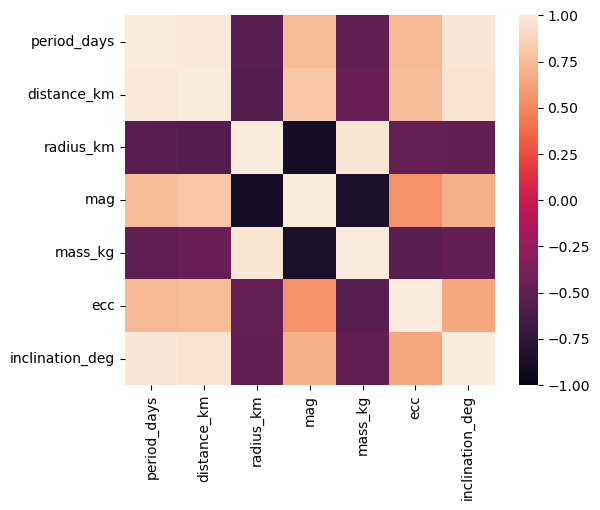

In [10]:
corr_matrix = jupiter_df.corr(numeric_only = True)

corr_matrix

sns.heatmap(data=corr_matrix, vmin = -1, vmax = 1, square = True)

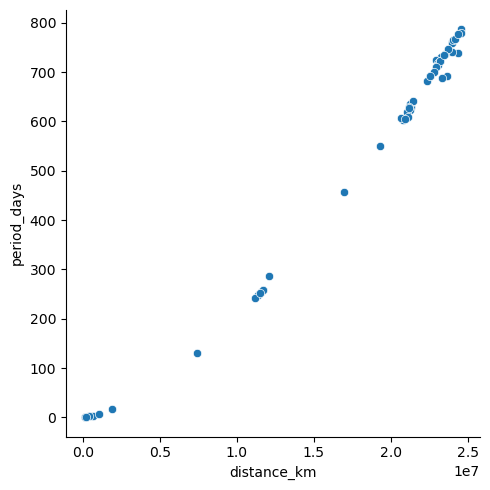

In [11]:
sns.relplot(data=jupiter_df, x='distance_km', y='period_days')

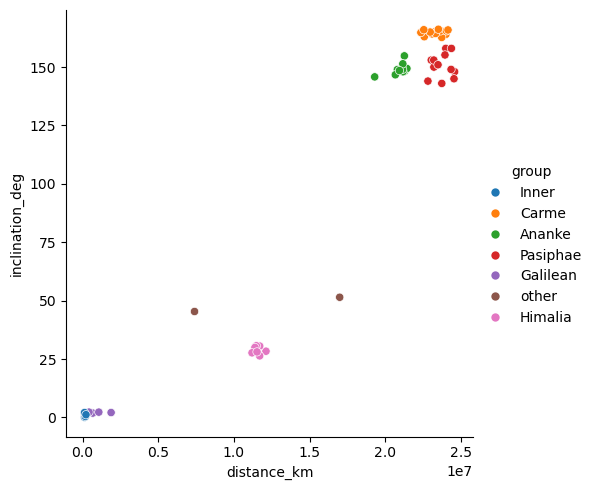

In [12]:
sns.relplot(data=jupiter_df, x='distance_km', y='inclination_deg', hue='group')

## Question 2

In [14]:
database = 'jupiter.db'
connectable = f'sqlite:///{database}'

jupiter_df = pd.read_sql('SELECT * FROM moons', connectable)

jupiter_df['group'] = jupiter_df['group'].replace('Hamilia', 'Himalia')

jupiter_df.head()


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
0,Adrastea,0.298,129000.0,8.2,NaN,NaN,Inner,0.001500,0.03
1,Aitne,730.000,23231000.0,1.5,22.7,NaN,Carme,0.264000,165.00
2,Amalthea,0.498,181400.0,83.5,14.1,2.080000e+18,Inner,0.003190,0.37
3,Ananke,630.000,21300000.0,14.0,18.9,NaN,Ananke,0.174725,148.60
4,Aoede,761.000,24000000.0,2.0,22.5,NaN,Pasiphae,0.432000,158.00


In [15]:
#T**2 = (4*(np.pi**2)*(a**3))/(G*M)

[3.061843e-16] 11539588135090.0


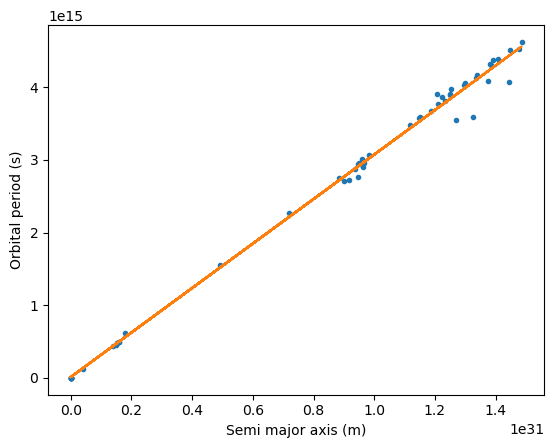

In [16]:


X = (jupiter_df[['distance_km']]*1000)**3
Y = (jupiter_df['period_days']*24*60*60)**2

model = linear_model.LinearRegression(fit_intercept=True) #??

model.fit(X,Y)

jupiter_df['predicted_period'] = model.predict(X)

fig, ax  = plt.subplots()
ax.plot((jupiter_df['distance_km']*1000)**3 ,(jupiter_df['period_days']*24*60*60)**2,'.')
ax.plot((jupiter_df['distance_km']*1000)**3, jupiter_df['predicted_period'])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel("Semi major axis (m)")
ax.set_ylabel("Orbital period (s)")

gradient = model.coef_
intercept = model.intercept_

print(gradient, intercept)

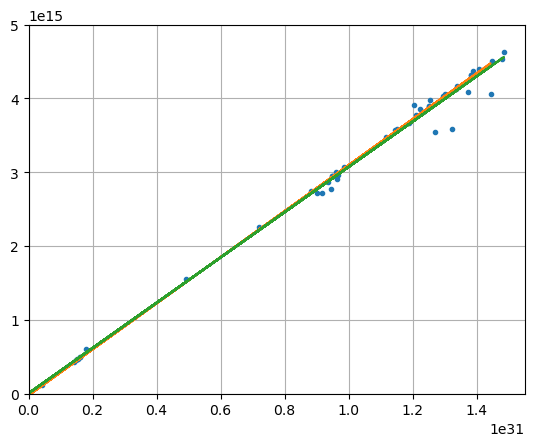

In [17]:

X = (jupiter_df[['distance_km']]*1000)**3
Y = (jupiter_df['period_days']*24*60*60)**2

x_train, x_test = train_test_split(X, test_size = 0.5, random_state = 42)
y_train, y_test = train_test_split(Y, test_size = 0.5, random_state = 42)

model = linear_model.LinearRegression(fit_intercept=True) #??

model.fit(x_train,y_train)

pred_period_split = model.predict(x_test)

fig, ax  = plt.subplots()
ax.plot(X ,Y, '.')
ax.plot(x_test, pred_period_split)
ax.plot(X, jupiter_df['predicted_period'])
ax.grid()
ax.set_xlim(0, 1.55e31)
ax.set_ylim(0, 5e15)
plt.show()

## Question 3


In [18]:
moon_orbits = pd.read_csv('moon_orbits.csv', skiprows = 2)
moon_orbits

,time,energy,ang_mom,r1x,r1y,r1z,v1x,v1y,v1z,r2x,...,r4z,v4x,v4y,v4z,r5x,r5y,r5z,v5x,v5y,v5z
0,0.0000,-40378.674072,211.230391,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.944191,...,-0.012780,118.511000,-151.543000,-2.389540,0.333627,-0.417099,-0.011166,120.271000,96.136900,5.375490
1,0.0001,-40378.670821,211.230391,-5.849942e-08,-6.170808e-08,-3.120124e-09,-0.001110,-0.001298,-0.000064,-0.945148,...,-0.012998,126.996092,-144.512416,-1.969730,0.345516,-0.407312,-0.010624,117.452648,99.557893,5.465908
2,0.0002,-40378.653331,211.230391,-2.220937e-07,-2.596941e-07,-1.275032e-08,-0.002095,-0.002719,-0.000130,-0.945965,...,-0.013174,135.068063,-137.011193,-1.543501,0.357118,-0.397187,-0.010073,114.536721,102.896356,5.551792
3,0.0003,-40378.622007,211.230391,-4.774555e-07,-6.054450e-07,-2.909104e-08,-0.002940,-0.004246,-0.000198,-0.946642,...,-0.013307,142.701152,-129.063093,-1.112206,0.368423,-0.386733,-0.009514,111.525648,106.149493,5.633070
4,0.0004,-40378.577535,211.230391,-8.100088e-07,-1.108912e-06,-5.227025e-08,-0.003633,-0.005865,-0.000266,-0.947178,...,-0.013397,149.870916,-120.693202,-0.677216,0.379423,-0.375958,-0.008946,108.421939,109.314581,5.709673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0096,-40377.777147,211.230391,1.894475e-04,-1.564352e-04,-2.411292e-06,0.033313,0.006787,0.000789,-0.445724,...,-0.006760,-12.875044,-192.213235,-6.635675,-0.154816,0.513072,0.017368,-146.913639,-44.056332,-3.767758
97,0.0097,-40377.886039,211.230391,1.927146e-04,-1.556923e-04,-2.331071e-06,0.031967,0.008007,0.000812,-0.435480,...,-0.007413,-1.820433,-192.586339,-6.403766,-0.169444,0.508456,0.016984,-145.582982,-48.245392,-3.908610
98,0.0098,-40377.993197,211.230391,1.958408e-04,-1.548338e-04,-2.248882e-06,0.030505,0.009095,0.000829,-0.425171,...,-0.008041,9.230789,-192.329201,-6.151106,-0.183932,0.503423,0.016586,-144.133091,-52.394458,-4.046242
99,0.0099,-40378.097077,211.230391,1.988156e-04,-1.538734e-04,-2.165362e-06,0.028944,0.010039,0.000839,-0.414798,...,-0.008643,20.243276,-191.443664,-5.878536,-0.198270,0.497977,0.016175,-142.565169,-56.500158,-4.180543


In [19]:
moon_orbits[['energy', 'ang_mom']].describe()


,energy,ang_mom
count,101.000000,1.010000e+02
mean,-40377.703565,2.112304e+02
std,0.688064,9.257802e-14
min,-40378.837114,2.112304e+02
25%,-40378.346831,2.112304e+02
50%,-40377.662360,2.112304e+02
75%,-40377.026269,2.112304e+02
max,-40376.793906,2.112304e+02


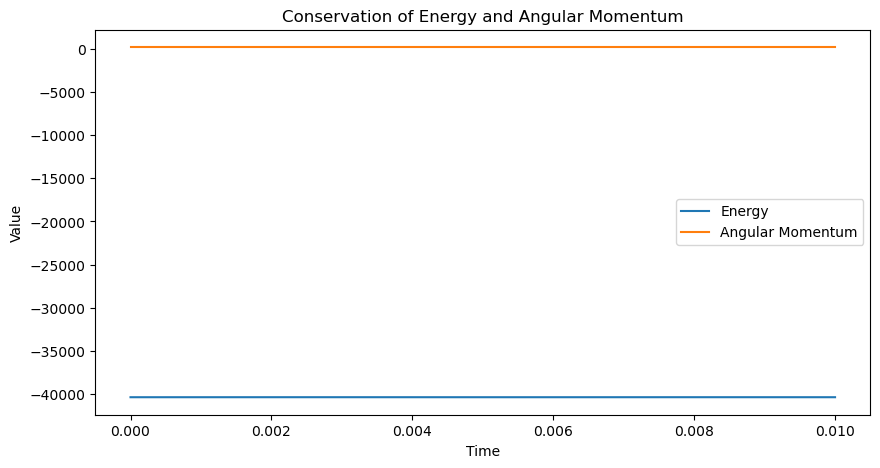

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(moon_orbits['time'], moon_orbits['energy'], label='Energy')
plt.plot(moon_orbits['time'], moon_orbits['ang_mom'], label='Angular Momentum')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Conservation of Energy and Angular Momentum')
plt.show()

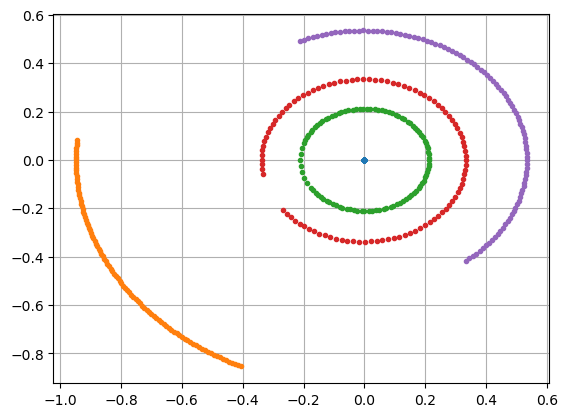

In [21]:
fig, ax = plt.subplots()

ax.plot(moon_orbits['r1x'], moon_orbits['r1y'],'.', moon_orbits['r2x'], moon_orbits['r2y'], '.', moon_orbits['r3x'], moon_orbits['r3y'],'.', moon_orbits['r4x'], moon_orbits['r4y'],'.', moon_orbits['r5x'], moon_orbits['r5y'],'.')
ax.grid()

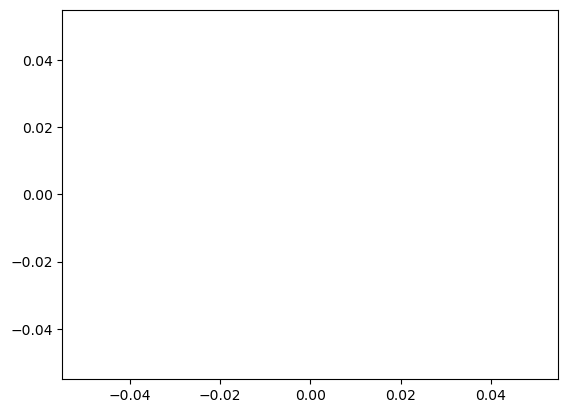

In [22]:
from matplotlib.animation import FuncAnimation 

fig, ax = plt.subplots()

points, = ax.plot([], [])

def update(frame):
    x = [moon_orbits['r3x'][frame] ]#for moon in range(1,5,1)]
    y = [moon_orbits['r3y'][frame]] #for moon in range(1,5,1)]
    points.set_data(x, y)
    return points,

anim = FuncAnimation(fig, update, frames = len(moon_orbits), interval = 50)

plt.show()




/opt/conda/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


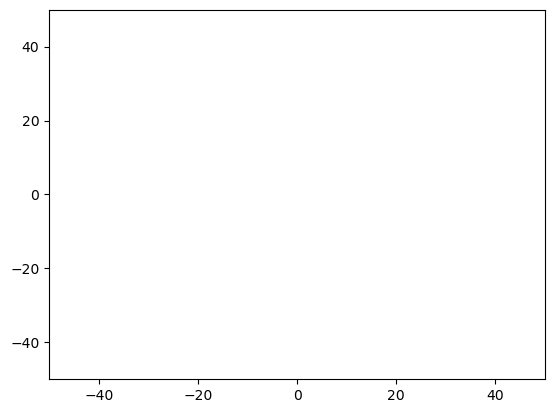

In [23]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Adjust the axis limits as needed for your data
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

# Create a scatter plot object
points, = ax.plot([], [], 'o')  # Unpack to get the single Line2D object

# Update function for animation
def update(frame):
    # Replace 'moon_orbits' column names with actual names in your DataFrame
    x = [moon_orbits[f'r{moon}x'][frame] for moon in range(1, 5)]
    y = [moon_orbits[f'r{moon}y'][frame] for moon in range(1, 5)]
    points.set_data(x, y)
    return points,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(moon_orbits), interval=50)

# Display the animation
plt.show()